In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-03-12'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2017-01-09'),
  Text(1000.0, 0, '2017-08-14'),
  Text(1500.0, 0, '2017-07-21'),
  Text(2000.0, 0, '2016-12-24'),
  Text(2500.0, 0, '')])

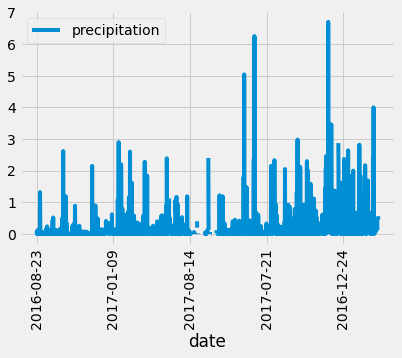

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
#results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))
# Sort the dataframe by date
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
# How many stations are available in this dataset? Use session.query()
session.query(func.count(Station.station)).all()

[(9,)]

In [29]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [32]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


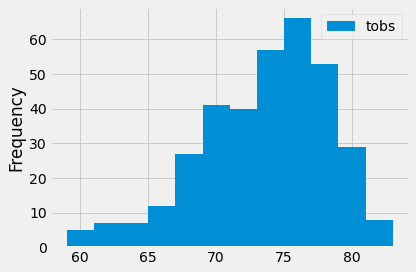

In [36]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
df.plot.hist(bins=12)
plt.tight_layout()

# Challenge

In [12]:
# Additional Queries for Challenge
from sqlalchemy import extract
june_prcp_results =  session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(june_prcp_results)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [14]:
june_prcp = session.query (Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(june_prcp)

[(0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.07,), (0.0,), (0.56,), (0.89,), (0.0,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.05,), (0.06,), (0.07,), (None,), (0.0,), (0.0,), (0.01,), (0.01,), (0.0,), (0.02,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.15,), (0.01,), (0.0,), (0.05,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.37,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.04,), (0.12,), (0.04,), (0.02,), (0.35,), (0.03,), (0.01,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.66,), (0.01,), (0.0,), (0.0

In [17]:
june_prcp_df = pd.DataFrame(june_prcp, columns =['Precipitation'])
june_prcp_df

,Precipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [18]:
june_prcp_df.describe()

,Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000
